In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
airbnb = pd.read_csv("AB_NYC_2019.csv")
airbnb.sample(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
700,258690,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.74618,-74.00392,Entire home/apt,195,365,10,2014-10-26,0.12,1,0
6048,4428906,Family Friendly Park Slope House,2119928,Rachael,Brooklyn,South Slope,40.66421,-73.98706,Entire home/apt,380,4,7,2018-08-29,0.12,1,62
13678,10251082,"Large, private 2BR in historic brownstone",14084903,Polina,Brooklyn,Prospect Heights,40.67473,-73.96529,Entire home/apt,295,3,182,2019-06-26,4.33,1,226
14282,11091309,"NYC-Legal 2br +parking, Metro- 4min, JFK -15min",7775937,Joseph,Brooklyn,East New York,40.66483,-73.88208,Entire home/apt,119,4,148,2019-06-30,3.75,1,111


In [11]:
airbnb.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
airbnb.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [4]:
airbnb.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [6]:
#Dividing the data in categorical and continuous.
cat = airbnb.select_dtypes('object')
con = airbnb.select_dtypes(exclude='object')
cat.shape,con.shape

((48895, 4), (48895, 9))

In [7]:
print('Categorical : ',cat.columns)
print('Continuous :',con.columns)

Categorical :  Index(['name', 'neighbourhood_group', 'neighbourhood', 'room_type'], dtype='object')
Continuous : Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


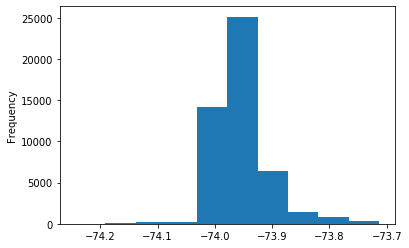

In [135]:
con.longitude.plot(kind='hist')

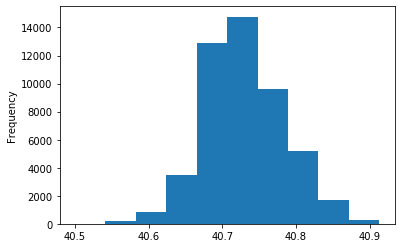

In [134]:
con.latitude.plot(kind='hist')

### There are many types of analysis to remove NaN values but for analysis purpose and for this type of dataset we are replacing with 0.

In [16]:
cat.fillna('0',inplace=True)
con.fillna(0,inplace=True)

### Most houses booked by customers are between 0 to 100 usd. The below plot is right skewed but the points beyond 300 usd cannot be said as outliers until we have a proof for that. Also one can guess by looking the mean and standard deviation as there is huge variation.

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


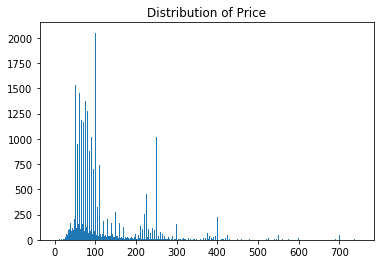

In [9]:
plt.hist(con.price,range(750));
print(con.price.describe())
plt.title('Distribution of Price');

### Most of the people book Entire home/apt or Private room.

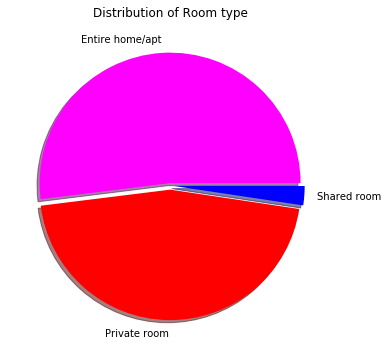

In [10]:
plt.figure(figsize=(6,6))
plt.pie(cat.room_type.value_counts(),labels=['Entire home/apt','Private room','Shared room'],explode=[0.02,0.03,0.03],
       colors=['fuchsia','red','blue'],shadow=True);
plt.title('Distribution of Room type');

### Most of the nights spend by people are between 0 to 7 range.

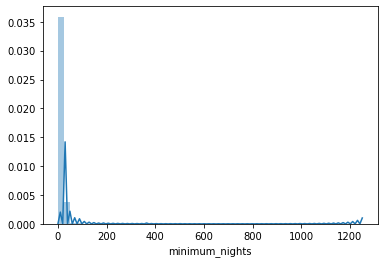

In [133]:
sns.distplot(con.minimum_nights);

###  As seen most of the values are concentrated in 1 to 60 range.

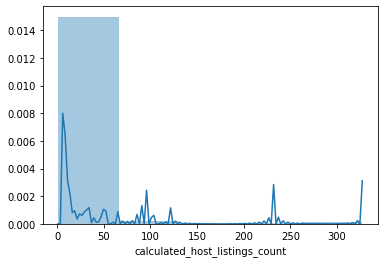

In [148]:
sns.distplot(con.calculated_host_listings_count,bins=5)

In [136]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Except from 1 to 20 there is a uniform distribution.

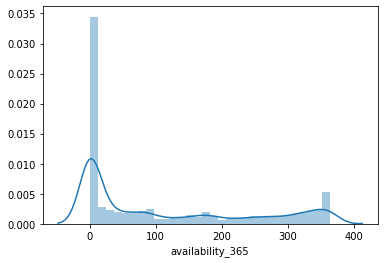

In [138]:
sns.distplot(con.availability_365)

### Which neighbourhood_group has highest average avalibility and host listings in a year?

In [23]:
availandhost=pd.pivot_table(airbnb,index='neighbourhood',values=['availability_365','calculated_host_listings_count'])
availandhost.head()

,availability_365,calculated_host_listings_count
neighbourhood,,
Allerton,163.666667,2.761905
Arden Heights,94.250000,1.000000
Arrochar,255.809524,4.190476
Arverne,188.428571,1.662338
Astoria,109.191111,2.772222


### Does logitude and latitude affects the price?

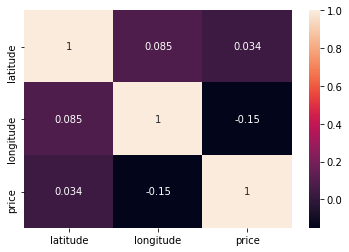

In [13]:
sns.heatmap(con[['latitude','longitude','price']].corr(),annot=True);

### In the above coorelation the default correlation method used is pearson. The seaborn library is used to add some colors to visualize the correlation. More it gets dark it has low correlation and vice-versa. As there is -ve correlation pf longitude with price we can drop it.

### Which neighbourhood and neighbourhood_group has highest mean price?

In [33]:
neighborandprice=pd.pivot_table(airbnb,index=['neighbourhood','neighbourhood_group'],values=['price'])
neighborandprice.head()

,,price
neighbourhood,neighbourhood_group,
Allerton,Bronx,87.595238
Arden Heights,Staten Island,67.250000
Arrochar,Staten Island,115.000000
Arverne,Queens,171.779221
Astoria,Queens,117.187778


### Which host has highest listing counts?

In [113]:
con.groupby('host_id')['calculated_host_listings_count'].mean().idxmax()

219517861

In [106]:
airbnb.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [115]:
airbnb.groupby('room_type')['number_of_reviews'].mean()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
Name: number_of_reviews, dtype: float64

#### Which place city has highest mean price.

In [131]:
con.groupby(['longitude'])[['latitude','price']].mean().idxmax()

latitude   -73.89417
price      -73.92450
dtype: float64